In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df = pd.read_csv("./Heart_Disease_Prediction.csv")
df.head(5)

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df["Heart Disease"] = df["Heart Disease"].map({"Presence":1,"Absence":0})
df.head(5)

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [4]:
df["Heart Disease"].unique()

array([1, 0], dtype=int64)

In [5]:
labels = df.columns
labels

Index(['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120',
       'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression',
       'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

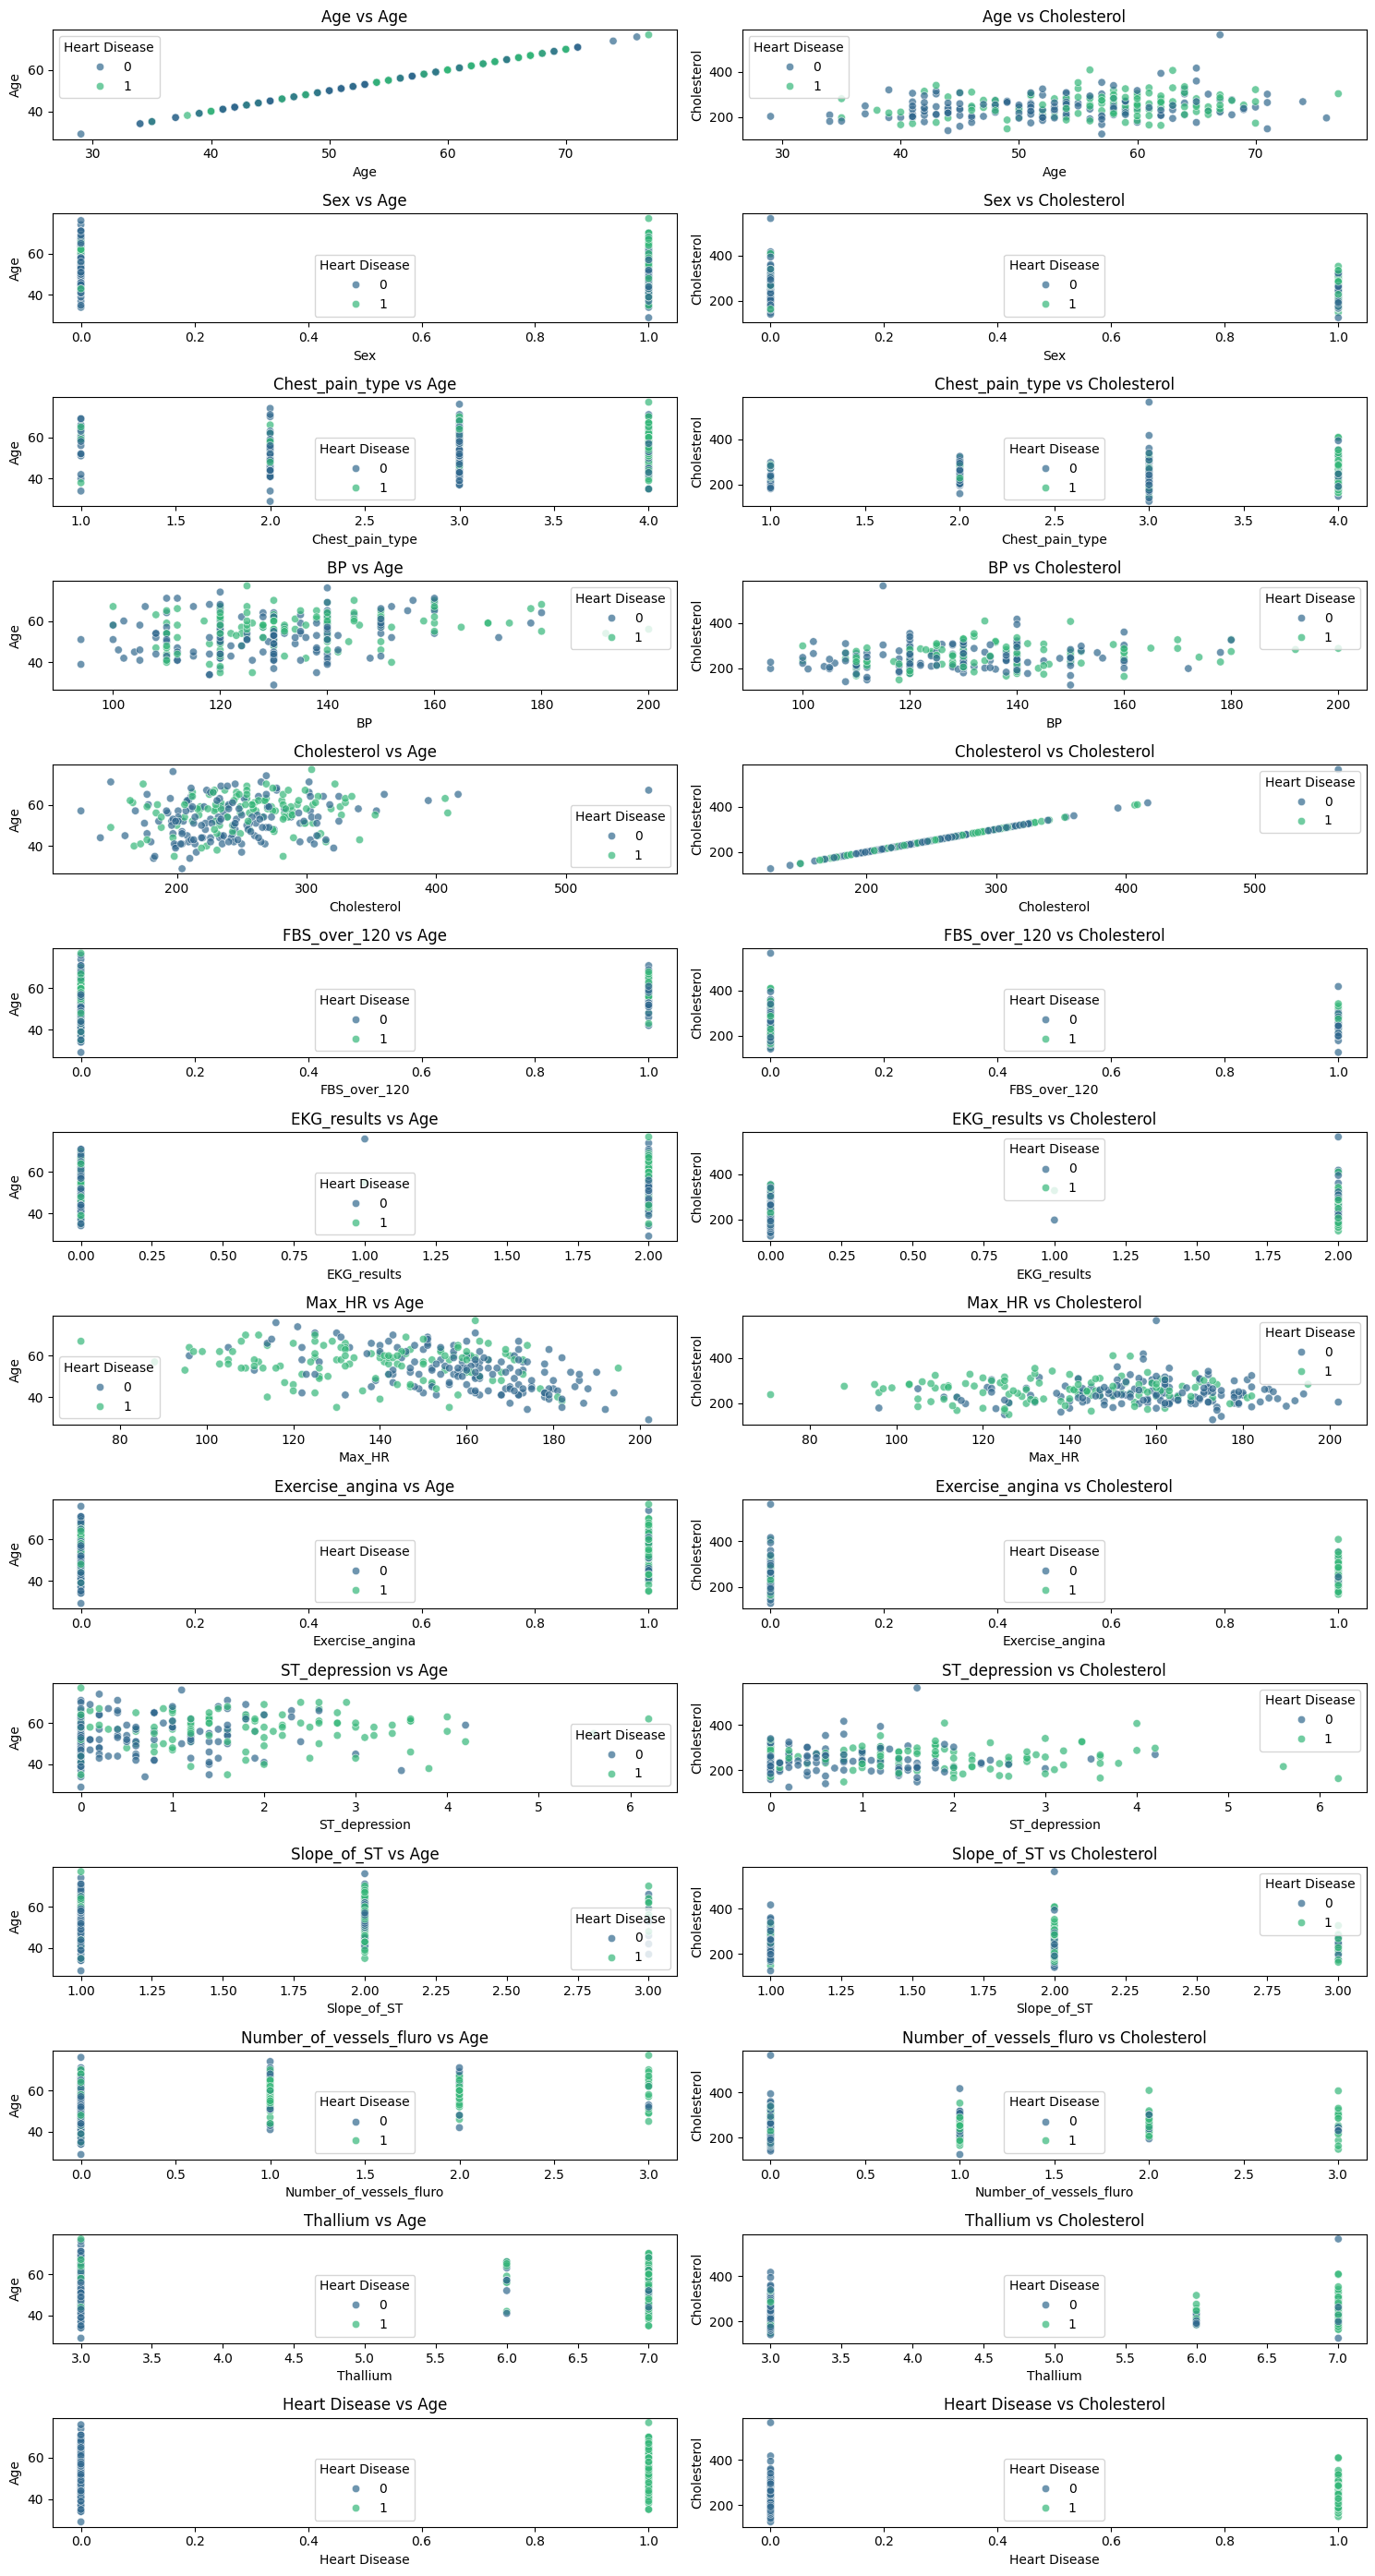

In [6]:

fig,axes = plt.subplots(nrows=len(labels),ncols=2,figsize = (15,2*len(labels)))

for i,label in enumerate(labels):
    sns.scatterplot(x=df[label],y=df["Age"],hue=df["Heart Disease"],ax=axes[i,0],palette='viridis',alpha=0.7)
    axes[i,0].set_title(f"{label} vs Age")
    axes[i,0].set_xlabel(label)
    axes[i,0].set_ylabel("Age")
    sns.scatterplot(x=df[label],y=df["Cholesterol"],hue=df["Heart Disease"],ax=axes[i,1],palette='viridis',alpha=0.7)
    axes[i,1].set_title(f"{label} vs Cholesterol")
    axes[i,1].set_xlabel(label)
    axes[i,1].set_ylabel("Cholesterol")
plt.tight_layout()
plt.show()

In [7]:
df.iloc[:,:-1]

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(df[["Age","Sex","Chest_pain_type","BP","Cholesterol","FBS_over_120","EKG_results","Max_HR","Exercise_angina","ST_depression","Slope_of_ST","Number_of_vessels_fluro","Thallium"]].values,df.iloc[:,-1].values,test_size=0.3,random_state=10)
scale = MinMaxScaler()
x_train_sc = scale.fit_transform(x_train)
x_test_sc = scale.transform(x_test)

In [9]:
print(x_train_sc)

[[0.41666667 1.         0.66666667 ... 0.         1.         0.        ]
 [0.60416667 0.         0.66666667 ... 0.         0.         0.        ]
 [0.54166667 0.         0.33333333 ... 0.5        0.         0.        ]
 ...
 [0.875      0.         1.         ... 0.5        0.         0.        ]
 [0.52083333 0.         0.66666667 ... 0.         0.33333333 0.        ]
 [0.47916667 1.         0.66666667 ... 0.         0.         1.        ]]


In [10]:
from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters=2,random_state=0)
kmean_model.fit(x_train_sc,y_train)
y_pred_kmean = kmean_model.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_kmean) * 100)

71.60493827160494


c:\Users\Admin\anaconda3\envs\testdatasets\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\anaconda3\envs\testdatasets\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
from sklearn.tree import DecisionTreeClassifier
Tree_model = DecisionTreeClassifier(criterion="entropy",random_state=0)
Tree_model.fit(x_train_sc,y_train)
y_pred_tree = Tree_model.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_tree)*100)

72.8395061728395


In [12]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model = RandomForestClassifier(n_estimators=3000,criterion='log_loss',random_state=0)
RandomForest_model.fit(x_train_sc,y_train)
y_pred_randomforest = RandomForest_model.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_randomforest)*100)

86.41975308641975


In [13]:
from sklearn.svm import SVC
SVC_model = SVC(gamma="auto")
SVC_model.fit(x_train_sc,y_train)
y_pred_SVC = SVC_model.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_SVC)*100)

81.48148148148148


In [14]:
value_max = 0
index_max = 3000
ar_value = []
for i in range(2500,3500,100):
    RandomForest_model = RandomForestClassifier(n_estimators=i,criterion='log_loss',random_state=0)
    RandomForest_model.fit(x_train_sc,y_train)
    y_pred_randomforest = RandomForest_model.predict(x_test_sc)
    ar_value.append(accuracy_score(y_test,y_pred_randomforest)*100)
    # if accuracy_score(y_test,y_pred_randomforest)*100 > value_max:
    #     value_max = accuracy_score(y_test,y_pred_randomforest)*100
    #     index_max = i
print(ar_value)



[85.18518518518519, 85.18518518518519, 85.18518518518519, 85.18518518518519, 85.18518518518519, 86.41975308641975, 86.41975308641975, 86.41975308641975, 86.41975308641975, 85.18518518518519]


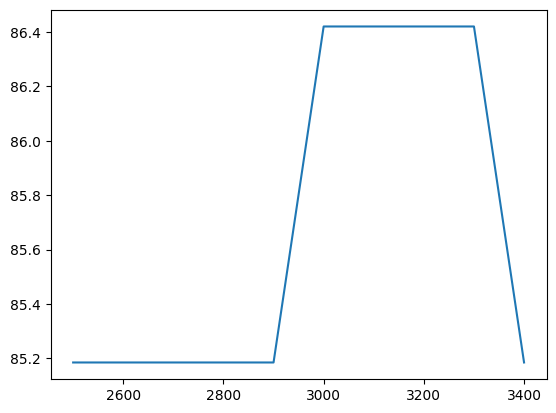

In [15]:
plt.plot(np.arange(2500,3500,100),ar_value)

In [16]:
RandomForest_model = RandomForestClassifier(n_estimators=3000,criterion='log_loss',random_state=0)
RandomForest_model.fit(x_train_sc,y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=3000, random_state=0)

In [17]:
import tensorflow as tf 
import keras
from keras import layers

In [18]:
inputs = keras.Input(shape=(None,len(df.columns)-1))
x = layers.Dense(64,activation='relu')(inputs)
x = layers.Dense(64,activation='relu')(x)
outputs = layers.Dense(2,activation='softmax')(x)

model_tf = keras.Model(inputs = inputs,outputs = outputs)


In [19]:
model_tf.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [20]:
earlyStopping = keras.callbacks.EarlyStopping()
history = model_tf.fit(
    x_train_sc,
    y_train,
    batch_size=150,
    epochs=10,
    # callbacks=[earlyStopping]
)

Epoch 1/10
2/2 [==============================] - 0s 8ms/step - loss: 0.7027 - sparse_categorical_accuracy: 0.4286
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 0.6627 - sparse_categorical_accuracy: 0.6878
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6356 - sparse_categorical_accuracy: 0.7196
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6147 - sparse_categorical_accuracy: 0.7989
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 0.5950 - sparse_categorical_accuracy: 0.8148
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 0.5773 - sparse_categorical_accuracy: 0.8095
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 0.5618 - sparse_categorical_accuracy: 0.8254
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 0.5426 - sparse_categorical_accuracy: 0.8254
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 0.5263 - s

In [21]:
history.history['sparse_categorical_accuracy']

[0.4285714328289032,
 0.6878306865692139,
 0.7195767164230347,
 0.7989417910575867,
 0.8148148059844971,
 0.8095238208770752,
 0.8253968358039856,
 0.8253968358039856,
 0.8306878209114075,
 0.8253968358039856]

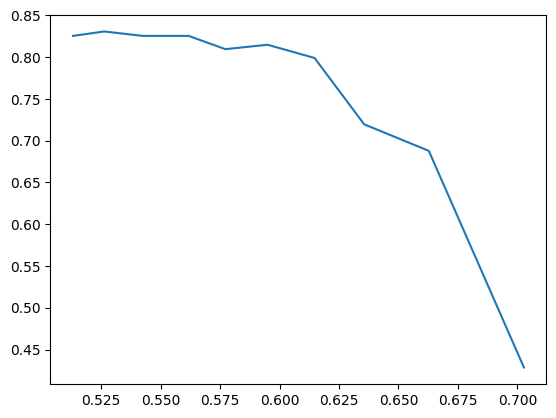

In [22]:
plt.figure()
plt.plot(history.history['loss'],history.history['sparse_categorical_accuracy'])

In [23]:
result = model_tf.evaluate(x_test,y_test,batch_size=64)


2/2 [==============================] - 0s 3ms/step - loss: 106.6384 - sparse_categorical_accuracy: 0.4691


In [24]:
y_pred_randomforest = RandomForest_model.predict(x_test_sc)
print(accuracy_score(y_test,y_pred_randomforest))

0.8641975308641975


In [25]:
RandomForest_model.predict(scale.transform([[70,1,4,130,322,0,2,109,0,2.4,2,3,3]]))

array([0], dtype=int64)

In [27]:
import pickle
pickle.dump(RandomForest_model,open('Heart_Disease_model.pkl','wb')) 